In [1]:
from vision import Vision
from globalPlanning import GlobalPlanning
from localPlanning import LocalPlanning
from thymioControl import ThymioControl
from kalman import Kalman
from plotter import Plotter

import numpy as np
import math
import time

In [2]:
vision = Vision()
globalPlanning = GlobalPlanning()
localPlanning = LocalPlanning()
thymio = ThymioControl()
plotter = Plotter()
filter = Kalman()

In [3]:
globalPlanning = GlobalPlanning()
matrix = np.zeros((20, 30))
matrix[1:6, 9:11] = -1; matrix[11, 1] = -1; matrix[10:17, 17:26] = -1
start = (1, 1)
goal = (19, 28)
plotter.set_map(matrix, start, goal)
if start == None:
    print("No start found")
elif goal == None:
    print("No goal found")
else:
    #path, matrix2 = globalPlanning.dijkstra(vision.get_matrix(), vision.get_start(), vision.get_goal)
    path, matrix2 = globalPlanning.dijkstra(matrix.copy(), start, goal)

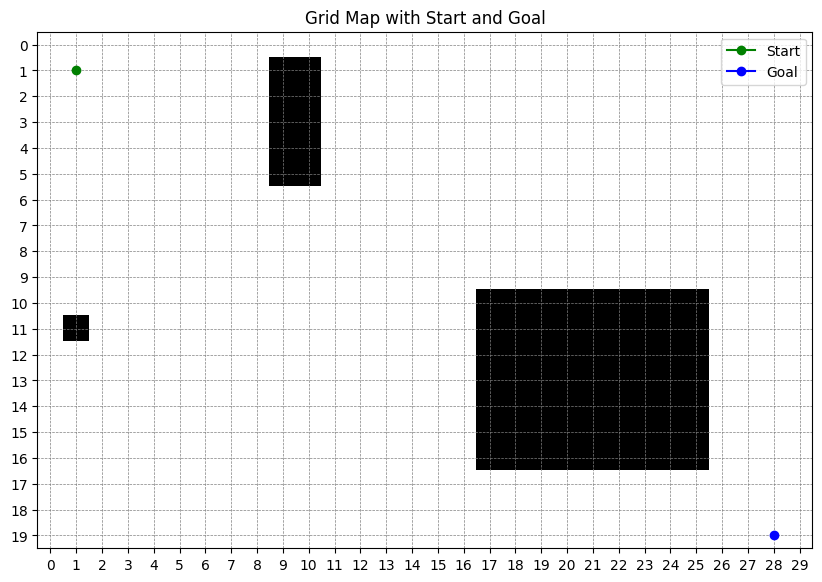

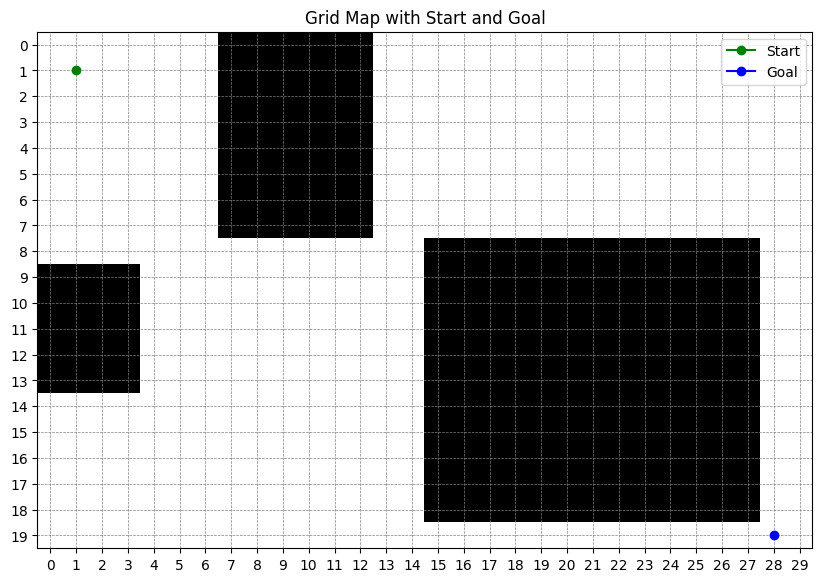

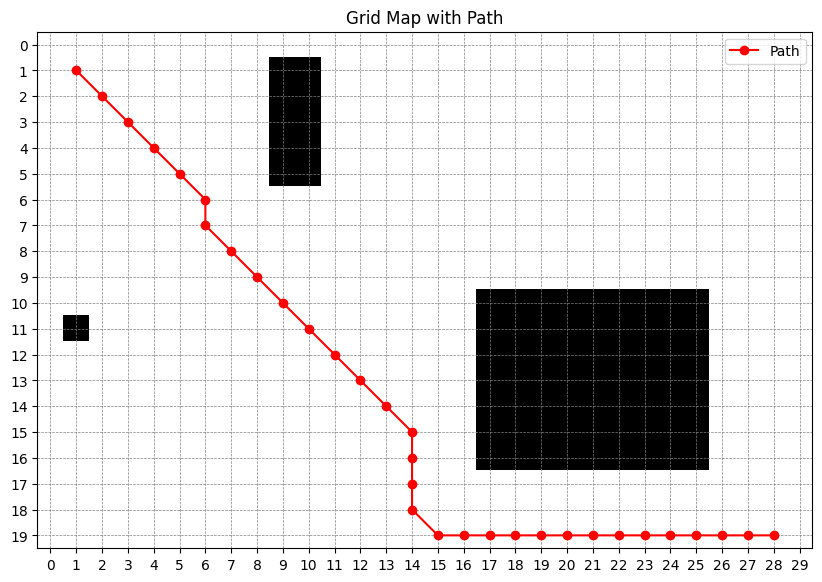

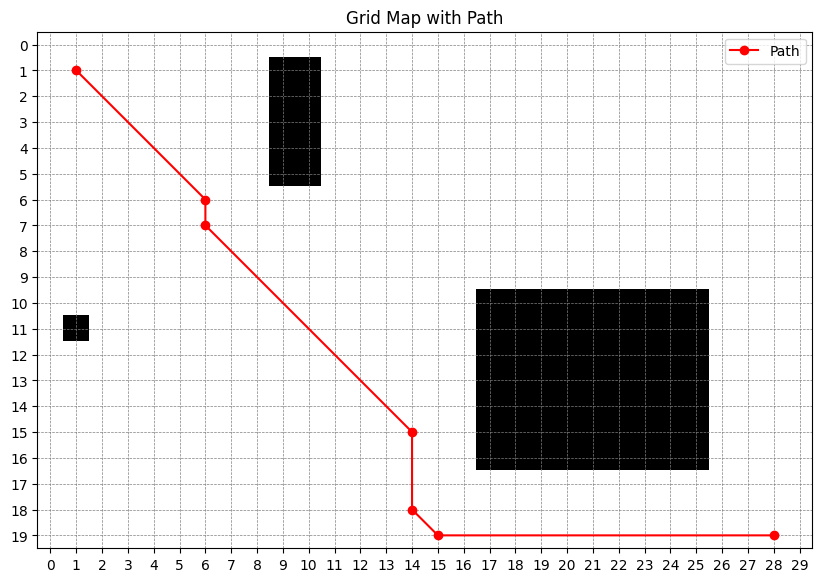

In [4]:
plotter.plot_map()
plotter.plot_map_given(matrix2, start, goal)
plotter.plot_path(path)
thymio.set_path(path.copy())
path2 = thymio.get_path_cells()
plotter.plot_path(path2)

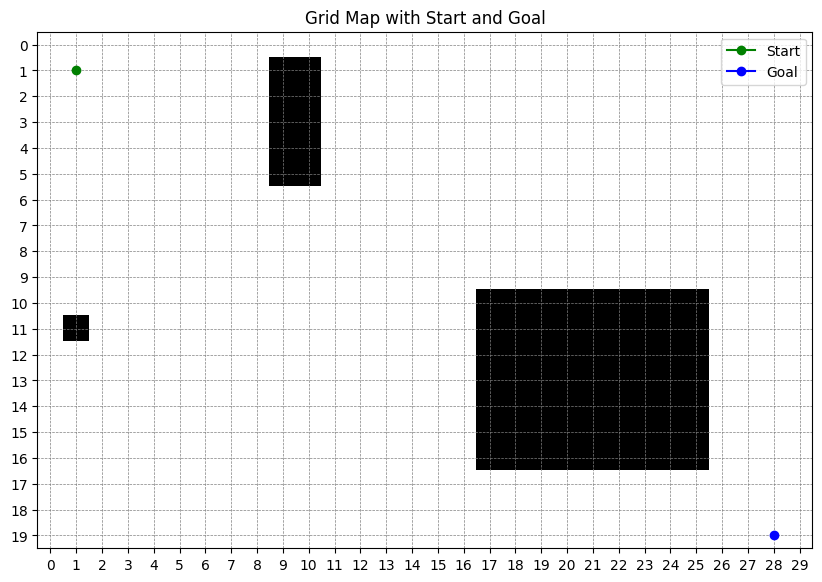

In [5]:
matrix = np.zeros((20, 30))
matrix[1:6, 9:11] = -1; matrix[11, 1] = -1; matrix[10:17, 17:26] = -1
start = (1, 1)
goal = (19, 28)
plotter.set_map(matrix, start, goal)

plotter.plot_map()

Position:  [1, 1]
position 0:  1
position 1:  1
Angle:  0.0
First iteration
Computing path
Map shape:  (20, 30)


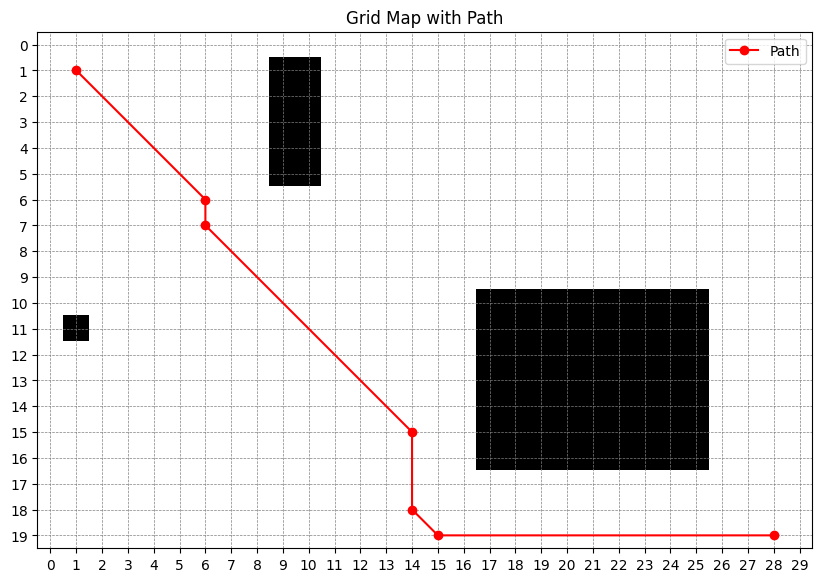

Kalman update:  (10.0, 10.0, 0.0)
Kalman position used:  [10.0, 10.0]
objective:  [60, 60]  position:  [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
x_diff:  50.0  y_diff:  50.0  distance:  70.71067811865476
my angle:  0.0
waypoint angle:  0.7853981633974483
diff angle:  0.7853981633974483
angleDistance:  0.7853981633974483
Speed:  6.0 0.4319689898685966
Kalman prediction:  (10.0, 10.0, 0.0)
Kalman pos 0:  10.0
Kalman pos 1:  10.0
v, w  60 0.4319689898685966
angle:  0.0
New angle:  0.06479534848028949
Trajectory:  [1.0] [1.0]


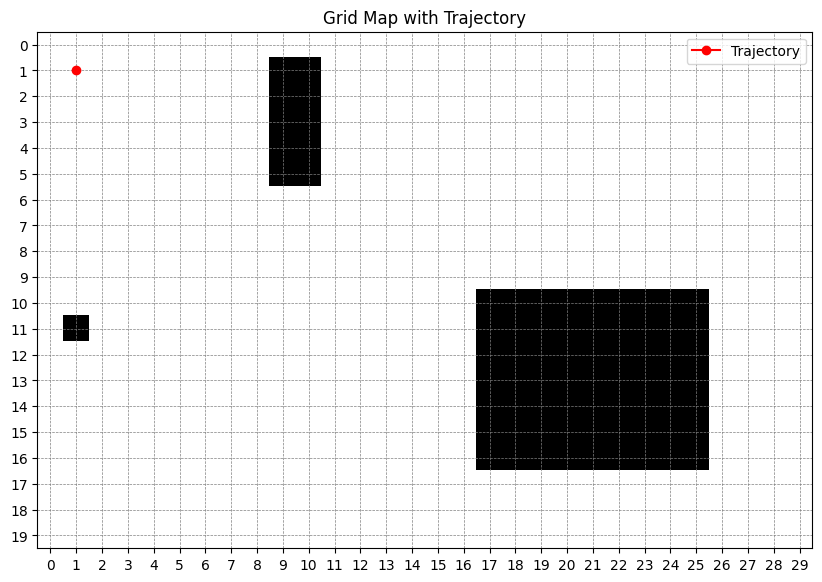

Position:  [1.899370366610644, 1.02914770677368]
position 0:  1.899370366610644
position 1:  1.02914770677368
Angle:  0.06479534848028949
Kalman update:  (17.066057745353646, 10.191281825702275, 6.113600105312914)
Kalman position used:  [17.066057745353646, 10.191281825702275]
objective:  [60, 60]  position:  [17.066057745353646, 10.191281825702275, 17.066057745353646, 10.191281825702275, 17.066057745353646, 10.191281825702275, 17.066057745353646, 10.191281825702275, 17.066057745353646, 10.191281825702275, 17.066057745353646, 10.191281825702275, 17.066057745353646, 10.191281825702275, 17.066057745353646, 10.191281825702275, 17.066057745353646, 10.191281825702275, 17.066057745353646, 10.191281825702275]
x_diff:  42.933942254646354  y_diff:  49.808718174297724  distance:  65.75889144208503
my angle:  6.113600105312914
waypoint angle:  0.859390274730482
diff angle:  -5.254209830582432
angleDistance:  1.0289754765971546
Speed:  6.0 0.5659365121284351
Kalman prediction:  (17.066057745353646

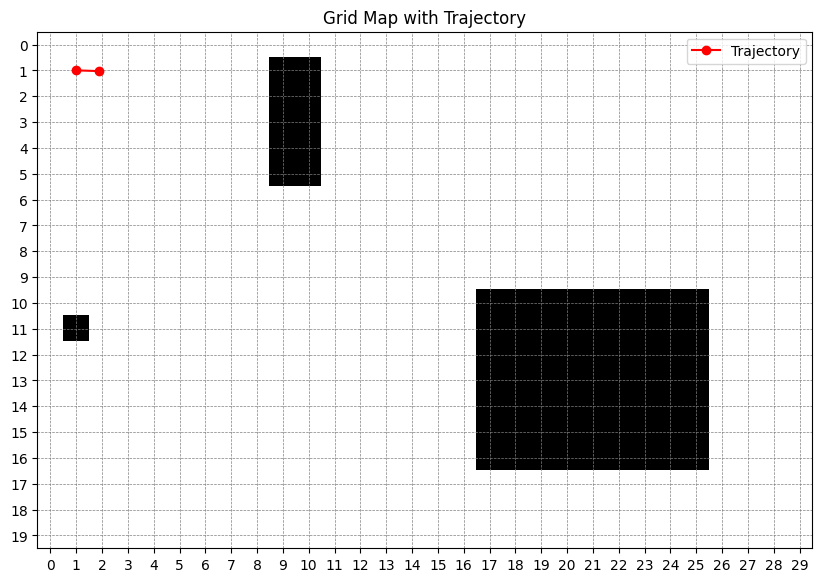

Position:  [2.5990734767388988, 0.9050445035247338]
position 0:  2.5990734767388988
position 1:  0.9050445035247338
Angle:  6.198490582132179
Kalman update:  (24.017584627666633, 9.25894852375629, 0.18629094155423864)
Kalman position used:  [24.017584627666633, 9.25894852375629]
objective:  [60, 60]  position:  [24.017584627666633, 9.25894852375629, 24.017584627666633, 9.25894852375629, 24.017584627666633, 9.25894852375629, 24.017584627666633, 9.25894852375629, 24.017584627666633, 9.25894852375629, 24.017584627666633, 9.25894852375629, 24.017584627666633, 9.25894852375629, 24.017584627666633, 9.25894852375629, 24.017584627666633, 9.25894852375629, 24.017584627666633, 9.25894852375629]
x_diff:  35.982415372333364  y_diff:  50.74105147624371  distance:  62.204409176053964
my angle:  0.18629094155423864
waypoint angle:  0.9539636686624458
diff angle:  0.7676727271082071
angleDistance:  0.7676727271082071
Speed:  6.0 0.4222199999095139
Kalman prediction:  (24.017584627666633, 9.25894852375

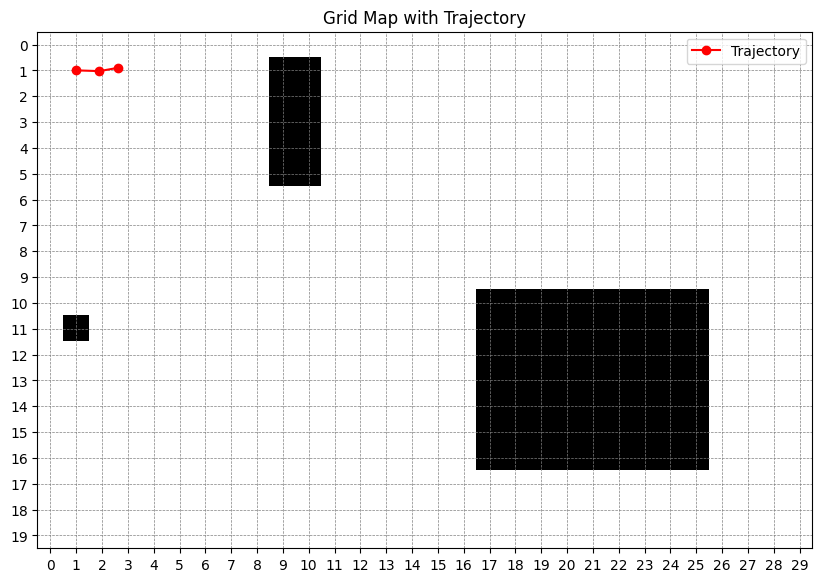

Position:  [3.2803186577274195, 1.1204745863603087]
position 0:  3.2803186577274195
position 1:  1.1204745863603087
Angle:  0.24962394154066572
Kalman update:  (30.872459619700813, 10.693142746394969, 5.935025974278414)
Kalman position used:  [30.872459619700813, 10.693142746394969]
objective:  [60, 60]  position:  [30.872459619700813, 10.693142746394969, 30.872459619700813, 10.693142746394969, 30.872459619700813, 10.693142746394969, 30.872459619700813, 10.693142746394969, 30.872459619700813, 10.693142746394969, 30.872459619700813, 10.693142746394969, 30.872459619700813, 10.693142746394969, 30.872459619700813, 10.693142746394969, 30.872459619700813, 10.693142746394969, 30.872459619700813, 10.693142746394969]
x_diff:  29.127540380299187  y_diff:  49.30685725360503  distance:  57.26761546313364
my angle:  5.935025974278414
waypoint angle:  1.0372133605326732
diff angle:  -4.8978126137457405
angleDistance:  1.3853726934338457
Speed:  6.0 0.7619549813886152
Kalman prediction:  (30.87245961

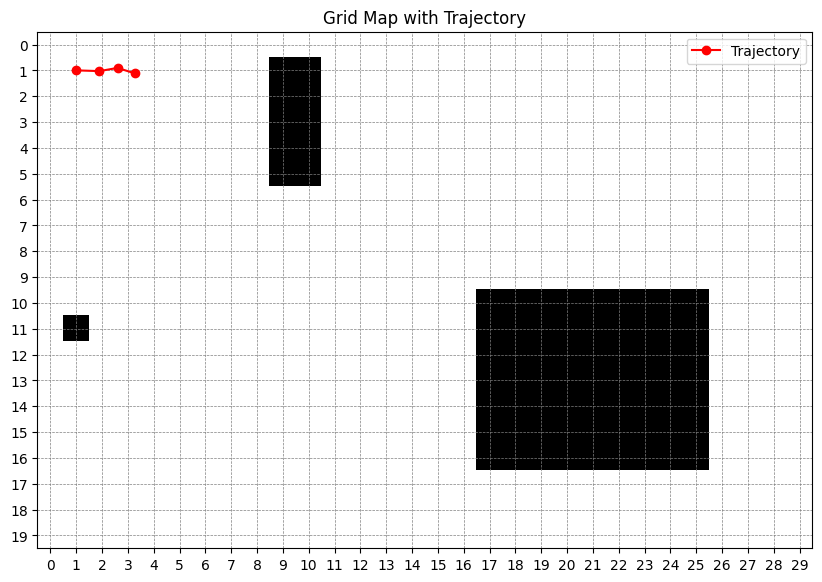

Position:  [3.948935192810185, 0.8112245529790026]
position 0:  3.948935192810185
position 1:  0.8112245529790026
Angle:  6.049319221486706
Kalman update:  (37.56581621233546, 8.658217810713086, 0.3299392925205442)
Kalman position used:  [37.56581621233546, 8.658217810713086]
objective:  [60, 60]  position:  [37.56581621233546, 8.658217810713086, 37.56581621233546, 8.658217810713086, 37.56581621233546, 8.658217810713086, 37.56581621233546, 8.658217810713086, 37.56581621233546, 8.658217810713086, 37.56581621233546, 8.658217810713086, 37.56581621233546, 8.658217810713086, 37.56581621233546, 8.658217810713086, 37.56581621233546, 8.658217810713086, 37.56581621233546, 8.658217810713086]
x_diff:  22.434183787664537  y_diff:  51.34178218928692  distance:  56.029199535517996
my angle:  0.3299392925205442
waypoint angle:  1.158841205728306
diff angle:  0.8289019132077617
angleDistance:  0.828901913207762
Speed:  6.0 0.4558960522642691
Kalman prediction:  (37.56581621233546, 8.658217810713086, 0

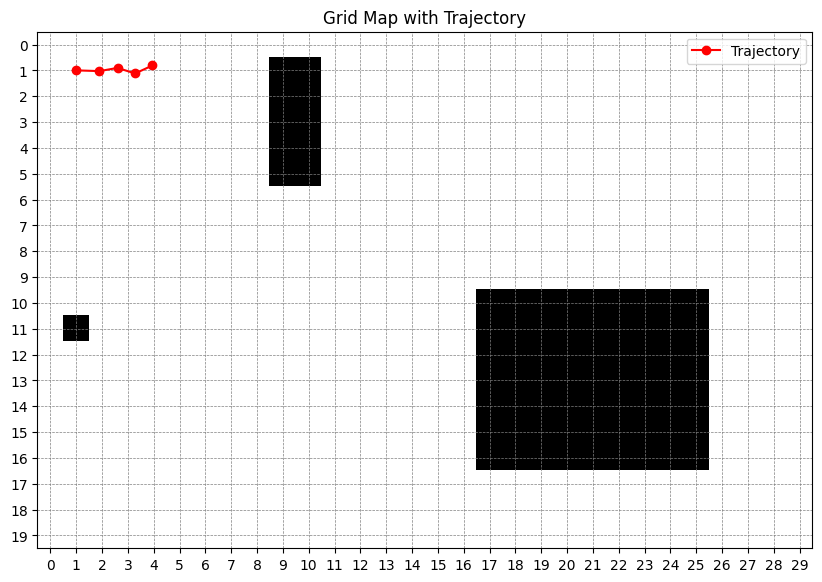

Position:  [4.597407841440154, 1.1862834133703197]
position 0:  4.597407841440154
position 1:  1.1862834133703197
Angle:  0.3983237003601846
Kalman update:  (44.127122786262, 11.050257931762768, 5.791252725321142)
Kalman position used:  [44.127122786262, 11.050257931762768]
objective:  [60, 60]  position:  [44.127122786262, 11.050257931762768, 44.127122786262, 11.050257931762768, 44.127122786262, 11.050257931762768, 44.127122786262, 11.050257931762768, 44.127122786262, 11.050257931762768, 44.127122786262, 11.050257931762768, 44.127122786262, 11.050257931762768, 44.127122786262, 11.050257931762768, 44.127122786262, 11.050257931762768, 44.127122786262, 11.050257931762768]
x_diff:  15.872877213738  y_diff:  48.94974206823723  distance:  51.45896889356953
my angle:  5.791252725321142
waypoint angle:  1.2572258580107292
diff angle:  -4.534026867310413
angleDistance:  1.7491584398691735
Speed:  6.0 0.9620371419280455
Kalman prediction:  (44.16539044586924, 11.029751321678583, 5.7904672762939

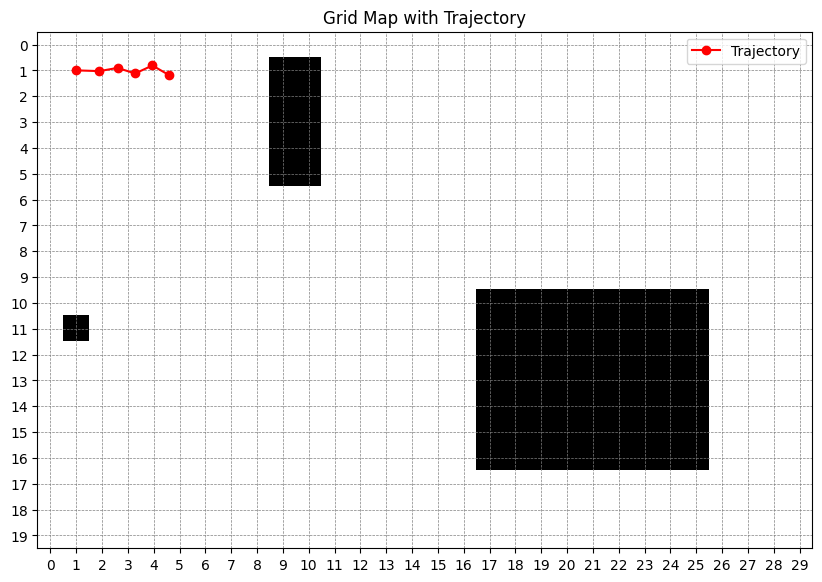

Position:  [5.233860197331529, 0.738540535176111]
position 0:  5.233860197331529
position 1:  0.738540535176111
Angle:  5.935558296610349
Kalman update:  (50.48992500228035, 8.16698126300014, 0.43934713924442814)
Kalman position used:  [50.48992500228035, 8.16698126300014]
objective:  [60, 60]  position:  [50.48992500228035, 8.16698126300014, 50.48992500228035, 8.16698126300014, 50.48992500228035, 8.16698126300014, 50.48992500228035, 8.16698126300014, 50.48992500228035, 8.16698126300014, 50.48992500228035, 8.16698126300014, 50.48992500228035, 8.16698126300014, 50.48992500228035, 8.16698126300014, 50.48992500228035, 8.16698126300014, 50.48992500228035, 8.16698126300014]
x_diff:  9.510074997719649  y_diff:  51.83301873699986  distance:  52.69822917188424
my angle:  0.43934713924442814
waypoint angle:  1.3893392740823851
diff angle:  0.949992134837957
angleDistance:  0.9499921348379567
Speed:  6.0 0.5224956741608763
Kalman prediction:  (50.48992500228035, 8.16698126300014, 0.4393471392444

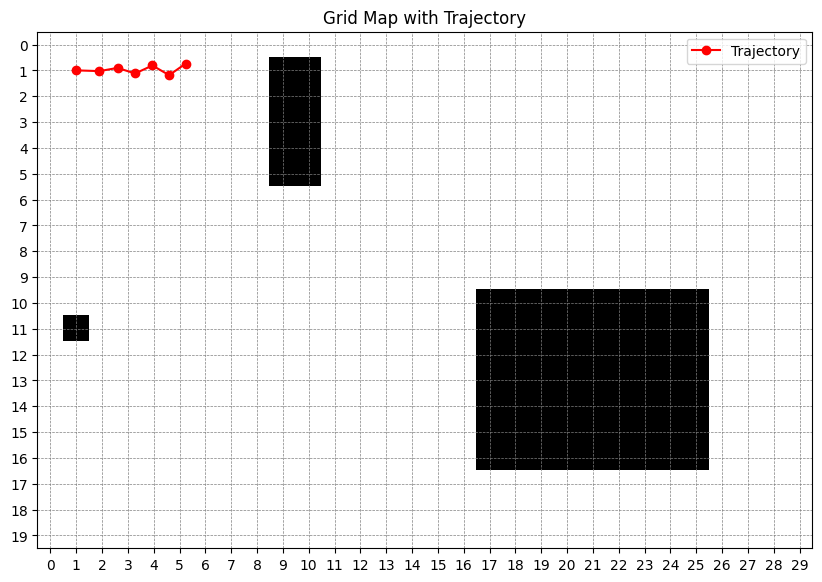

Position:  [5.847691758643881, 1.2310228276083333]
position 0:  5.847691758643881
position 1:  1.2310228276083333
Angle:  0.5177214903685596
Kalman update:  (56.72122521689193, 11.282669212233522, 5.675710657953544)
Kalman position used:  [56.72122521689193, 11.282669212233522]
objective:  [60, 60]  position:  [56.72122521689193, 11.282669212233522, 56.72122521689193, 11.282669212233522, 56.72122521689193, 11.282669212233522, 56.72122521689193, 11.282669212233522, 56.72122521689193, 11.282669212233522, 56.72122521689193, 11.282669212233522, 56.72122521689193, 11.282669212233522, 56.72122521689193, 11.282669212233522, 56.72122521689193, 11.282669212233522, 56.72122521689193, 11.282669212233522]
x_diff:  3.2787747831080694  y_diff:  48.71733078776648  distance:  48.82754021208733
my angle:  5.675710657953544
waypoint angle:  1.5035956474939547
diff angle:  -4.1721150104595885
angleDistance:  2.1110702967199977
Speed:  6.0 1.161088663195999
Kalman prediction:  (56.72122521689193, 11.28266

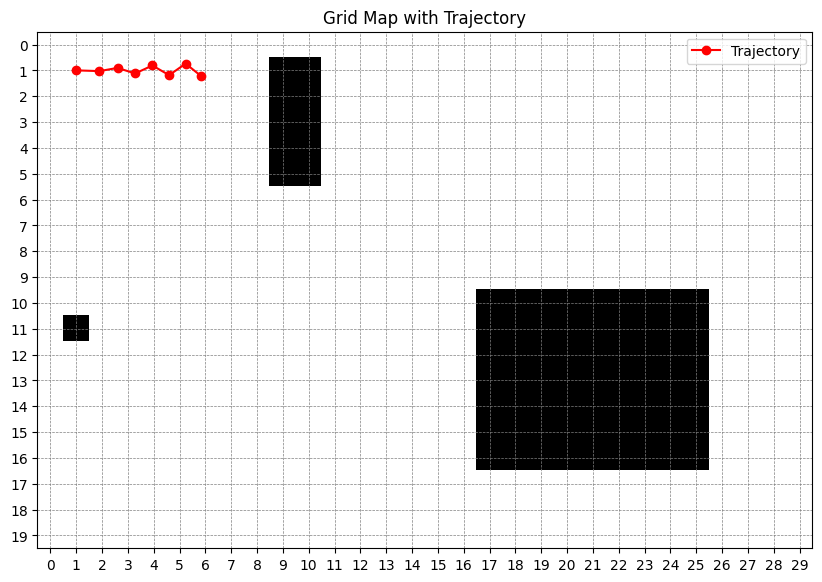

Position:  [6.451997444391938, 0.681333250195594]
position 0:  6.451997444391938
position 1:  0.681333250195594
Angle:  5.849873957432943
Kalman update:  (62.7270297334668, 7.769844437104938, 0.5216537437249178)
Kalman position used:  [62.7270297334668, 7.769844437104938]
objective:  [60, 60]  position:  [62.7270297334668, 7.769844437104938, 62.7270297334668, 7.769844437104938, 62.7270297334668, 7.769844437104938, 62.7270297334668, 7.769844437104938, 62.7270297334668, 7.769844437104938, 62.7270297334668, 7.769844437104938, 62.7270297334668, 7.769844437104938, 62.7270297334668, 7.769844437104938, 62.7270297334668, 7.769844437104938, 62.7270297334668, 7.769844437104938]
x_diff:  -2.7270297334668  y_diff:  52.230155562895064  distance:  52.3012986577908
my angle:  0.5216537437249178
waypoint angle:  1.6229607464514733
diff angle:  1.1013070027265555
angleDistance:  1.1013070027265552
Speed:  6.0 0.6057188514996055
Kalman prediction:  (62.7270297334668, 7.769844437104938, 0.521653743724917

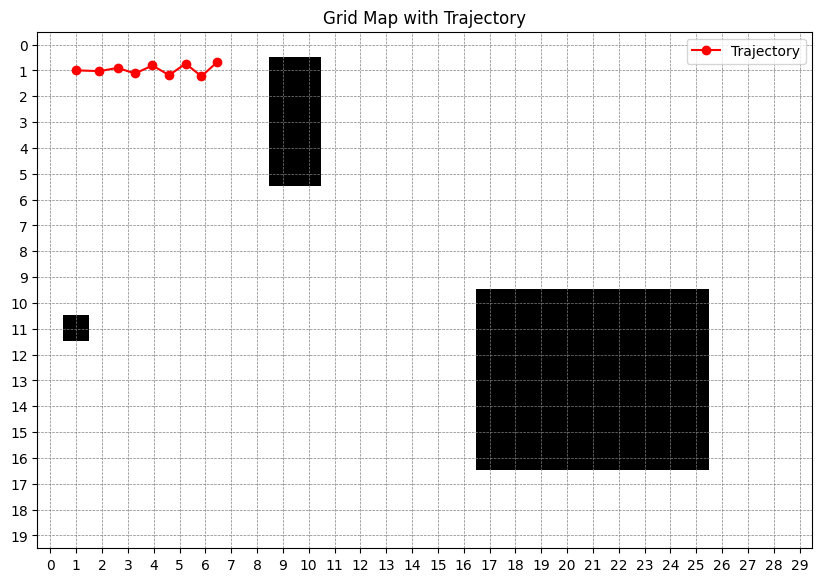

Position:  [7.03156640206439, 1.260274447316931]
position 0:  7.03156640206439
position 1:  1.260274447316931
Angle:  0.6125115714498586
Kalman update:  (68.64615745293162, 11.422248425707016, 5.583904925115931)
Kalman position used:  [68.64615745293162, 11.422248425707016]
objective:  [60, 60]  position:  [68.64615745293162, 11.422248425707016, 68.64615745293162, 11.422248425707016, 68.64615745293162, 11.422248425707016, 68.64615745293162, 11.422248425707016, 68.64615745293162, 11.422248425707016, 68.64615745293162, 11.422248425707016, 68.64615745293162, 11.422248425707016, 68.64615745293162, 11.422248425707016, 68.64615745293162, 11.422248425707016, 68.64615745293162, 11.422248425707016]
x_diff:  -8.646157452931618  y_diff:  48.57775157429298  distance:  49.341199688643655
my angle:  5.583904925115931
waypoint angle:  1.746937743318052
diff angle:  -3.836967181797879
angleDistance:  2.446218125381707
Speed:  6.0 1.3454199689599389
Kalman prediction:  (68.64615745293162, 11.4222484257

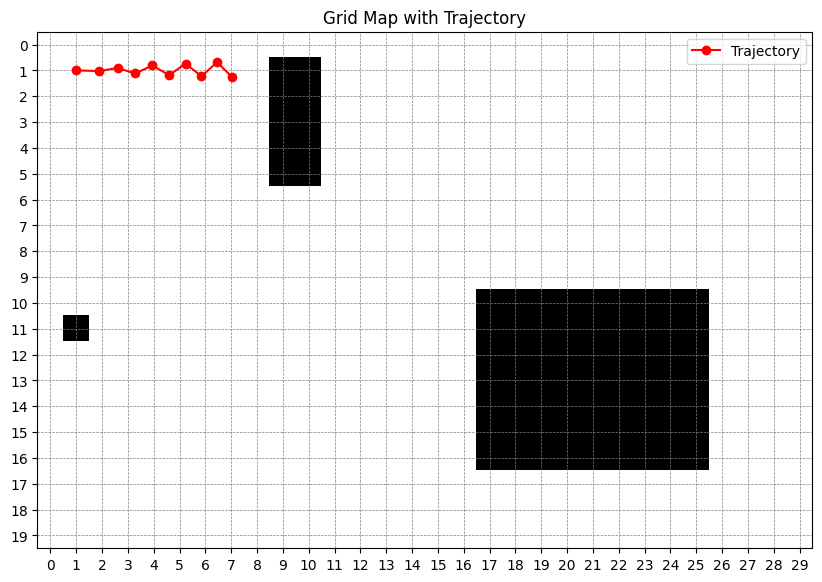

Position:  [7.6069818643515195, 0.6361150697557748]
position 0:  7.6069818643515195
position 1:  0.6361150697557748
Angle:  5.785717920459922
Kalman update:  (74.33272881037665, 7.438975227152206, 0.5831815878983964)
Kalman position used:  [74.33272881037665, 7.438975227152206]
objective:  [60, 60]  position:  [74.33272881037665, 7.438975227152206, 74.33272881037665, 7.438975227152206, 74.33272881037665, 7.438975227152206, 74.33272881037665, 7.438975227152206, 74.33272881037665, 7.438975227152206, 74.33272881037665, 7.438975227152206, 74.33272881037665, 7.438975227152206, 74.33272881037665, 7.438975227152206, 74.33272881037665, 7.438975227152206, 74.33272881037665, 7.438975227152206]
x_diff:  -14.33272881037665  y_diff:  52.561024772847794  distance:  54.4801655680645
my angle:  0.5831815878983964
waypoint angle:  1.8370112565993086
diff angle:  1.2538296687009123
angleDistance:  1.253829668700912
Speed:  6.0 0.6896063177855017
Kalman prediction:  (74.33272881037665, 7.438975227152206,

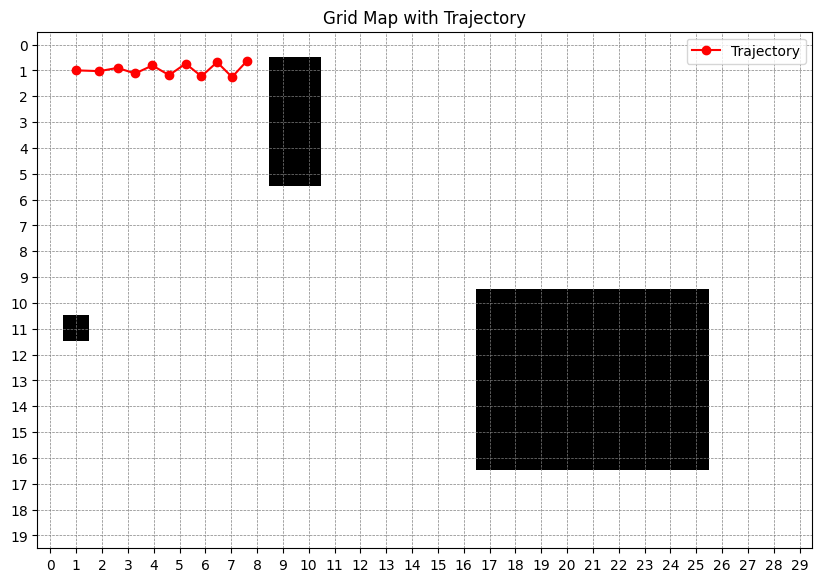

Position:  [8.157566673673102, 1.2774483708101452]
position 0:  8.157566673673102
position 1:  1.2774483708101452
Angle:  0.6866225355662217
Kalman update:  (79.98165443616188, 11.485135872324014, 5.512079681017485)
Kalman position used:  [79.98165443616188, 11.485135872324014]
objective:  [60, 60]  position:  [79.98165443616188, 11.485135872324014, 79.98165443616188, 11.485135872324014, 79.98165443616188, 11.485135872324014, 79.98165443616188, 11.485135872324014, 79.98165443616188, 11.485135872324014, 79.98165443616188, 11.485135872324014, 79.98165443616188, 11.485135872324014, 79.98165443616188, 11.485135872324014, 79.98165443616188, 11.485135872324014, 79.98165443616188, 11.485135872324014]
x_diff:  -19.981654436161875  y_diff:  48.514864127675985  distance:  52.46864354386389
my angle:  5.512079681017485
waypoint angle:  1.9614905303571184
diff angle:  -3.5505891506603664
angleDistance:  2.73259615651922
Speed:  6.0 1.502927886085571
Kalman prediction:  (79.98165443616188, 11.48513

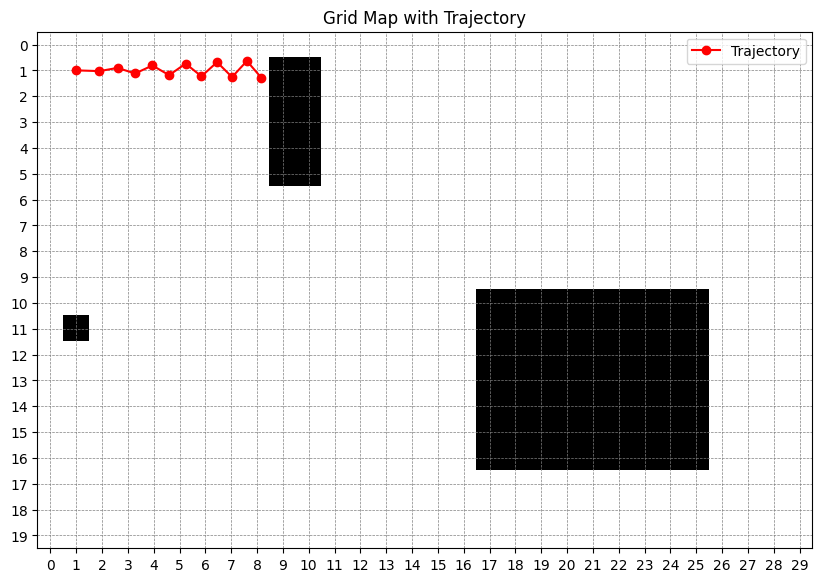

Position:  [8.708541581971284, 0.5990219969939071]
position 0:  8.708541581971284
position 1:  0.5990219969939071
Angle:  5.737518863930321
Kalman update:  (85.3947448205261, 7.155952978536222, 0.6293580525898577)
Kalman position used:  [85.3947448205261, 7.155952978536222]
objective:  [60, 60]  position:  [85.3947448205261, 7.155952978536222, 85.3947448205261, 7.155952978536222, 85.3947448205261, 7.155952978536222, 85.3947448205261, 7.155952978536222, 85.3947448205261, 7.155952978536222, 85.3947448205261, 7.155952978536222, 85.3947448205261, 7.155952978536222, 85.3947448205261, 7.155952978536222, 85.3947448205261, 7.155952978536222, 85.3947448205261, 7.155952978536222]
x_diff:  -25.3947448205261  y_diff:  52.84404702146378  distance:  58.62922795079526
my angle:  0.6293580525898577
waypoint angle:  2.0187714863879487
diff angle:  1.389413433798091
angleDistance:  1.389413433798091
Speed:  6.0 0.7641773885889501
Kalman prediction:  (85.3947448205261, 7.155952978536222, 0.62935805258985

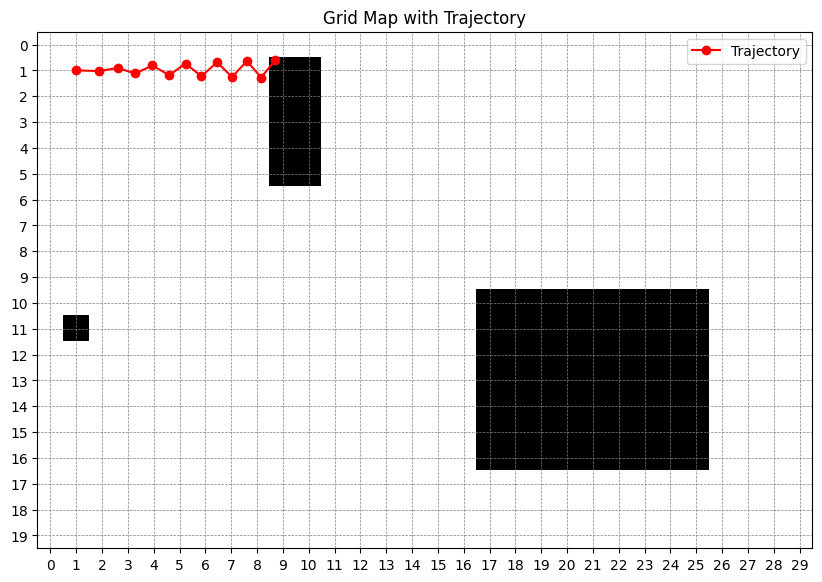

Position:  [9.235117981982382, 1.2858527917544171]
position 0:  9.235117981982382
position 1:  1.2858527917544171
Angle:  0.7439846608782001
Kalman update:  (90.82054822629063, 11.491048229192838, 5.4564623382701845)
Kalman position used:  [90.82054822629063, 11.491048229192838]
objective:  [60, 60]  position:  [90.82054822629063, 11.491048229192838, 90.82054822629063, 11.491048229192838, 90.82054822629063, 11.491048229192838, 90.82054822629063, 11.491048229192838, 90.82054822629063, 11.491048229192838, 90.82054822629063, 11.491048229192838, 90.82054822629063, 11.491048229192838, 90.82054822629063, 11.491048229192838, 90.82054822629063, 11.491048229192838, 90.82054822629063, 11.491048229192838]
x_diff:  -30.820548226290626  y_diff:  48.50895177080716  distance:  57.47194615524692
my angle:  5.4564623382701845
waypoint angle:  2.1368094072343795
diff angle:  -3.319652931035805
angleDistance:  2.9635323761437817
Speed:  6.0 1.62994280687908
Kalman prediction:  (90.8206416653884, 11.49094

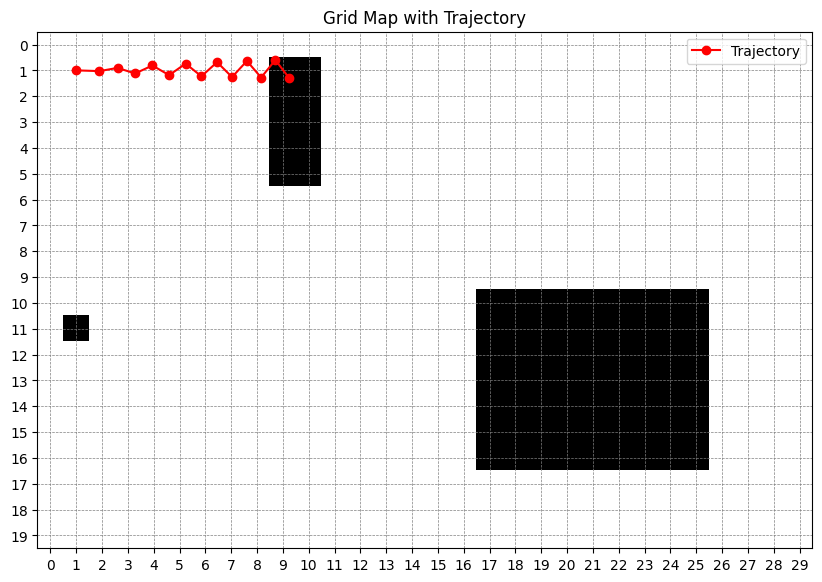

Position:  [9.766103290982672, 0.5676834264218534]
position 0:  9.766103290982672
position 1:  0.5676834264218534
Angle:  5.700953759302046
Kalman update:  (96.00822735816575, 6.907382443818843, 0.6643696677390603)
Kalman position used:  [96.00822735816575, 6.907382443818843]
objective:  [60, 60]  position:  [96.00822735816575, 6.907382443818843, 96.00822735816575, 6.907382443818843, 96.00822735816575, 6.907382443818843, 96.00822735816575, 6.907382443818843, 96.00822735816575, 6.907382443818843, 96.00822735816575, 6.907382443818843, 96.00822735816575, 6.907382443818843, 96.00822735816575, 6.907382443818843, 96.00822735816575, 6.907382443818843, 96.00822735816575, 6.907382443818843]
x_diff:  -36.008227358165755  y_diff:  53.09261755618115  distance:  64.15152746774056
my angle:  0.6643696677390603
waypoint angle:  2.166751604163745
diff angle:  1.5023819364246846
angleDistance:  1.502381936424685
Speed:  6.0 0.8263100650335768
Kalman prediction:  (96.00822735816575, 6.907382443818843, 0

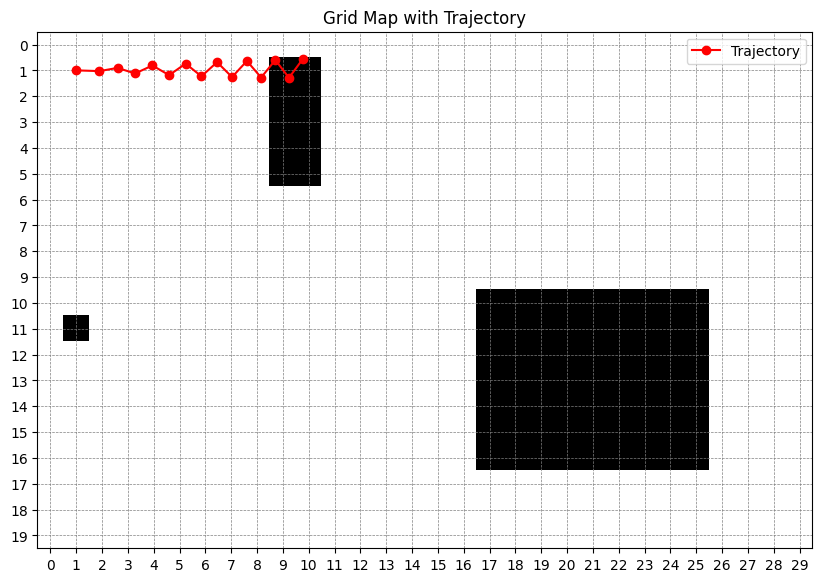

Position:  [10.273239506391349, 1.2880817241056728]
position 0:  10.273239506391349
position 1:  1.2880817241056728
Angle:  0.7883161774940968
Kalman update:  (101.25382031758097, 11.456385571110278, 5.413467873983532)
Kalman position used:  [101.25382031758097, 11.456385571110278]
objective:  [60, 60]  position:  [101.25382031758097, 11.456385571110278, 101.25382031758097, 11.456385571110278, 101.25382031758097, 11.456385571110278, 101.25382031758097, 11.456385571110278, 101.25382031758097, 11.456385571110278, 101.25382031758097, 11.456385571110278, 101.25382031758097, 11.456385571110278, 101.25382031758097, 11.456385571110278, 101.25382031758097, 11.456385571110278, 101.25382031758097, 11.456385571110278]
x_diff:  -41.253820317580974  y_diff:  48.543614428889725  distance:  63.70526032138922
my angle:  5.413467873983532
waypoint angle:  2.27519169458996
diff angle:  -3.1382761793935714
angleDistance:  -3.1382761793935714
Speed:  6.0 -1.7260518986664644
Kalman prediction:  (101.253820

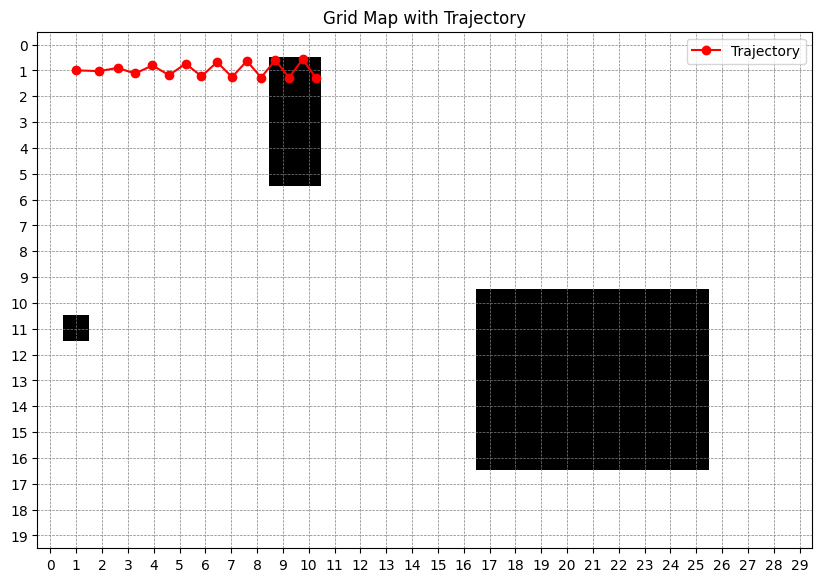

Position:  [10.61092271854846, 0.3908302397992352]
position 0:  10.61092271854846
position 1:  0.3908302397992352
Angle:  5.154560089183562
Kalman update:  (105.12558611801931, 5.728110046231751, 1.2008313274119127)
Kalman position used:  [105.12558611801931, 5.728110046231751]
objective:  [60, 60]  position:  [105.12558611801931, 5.728110046231751, 105.12558611801931, 5.728110046231751, 105.12558611801931, 5.728110046231751, 105.12558611801931, 5.728110046231751, 105.12558611801931, 5.728110046231751, 105.12558611801931, 5.728110046231751, 105.12558611801931, 5.728110046231751, 105.12558611801931, 5.728110046231751, 105.12558611801931, 5.728110046231751, 105.12558611801931, 5.728110046231751]
x_diff:  -45.125586118019314  y_diff:  54.27188995376825  distance:  70.58155964307326
my angle:  1.2008313274119127
waypoint angle:  2.264435423622964
diff angle:  1.0636040962110513
angleDistance:  1.0636040962110513
Speed:  6.0 0.5849822529160783
Kalman prediction:  (105.12558611801931, 5.7281

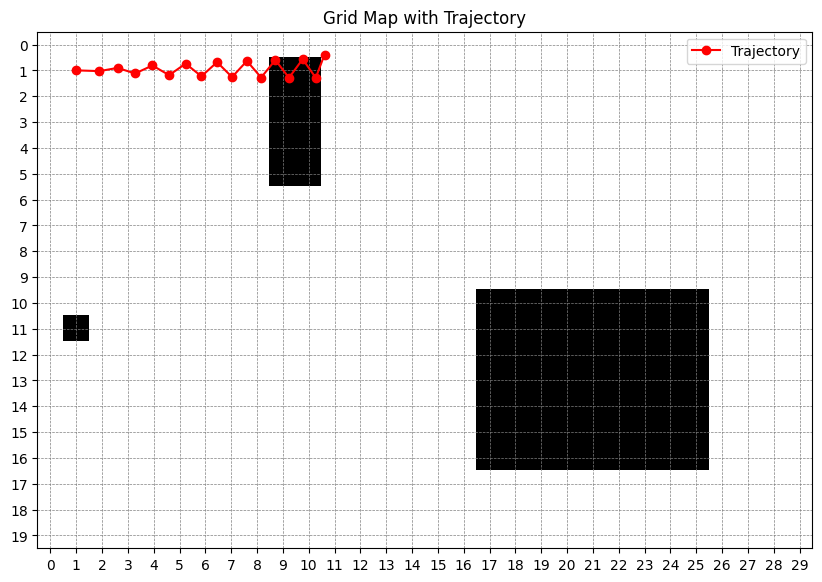

Position:  [10.800774642589397, 1.4251090336502799]
position 0:  10.800774642589397
position 1:  1.4251090336502799
Angle:  1.2885786653493243
Kalman update:  (107.36957917116332, 12.321778949605552, 4.93067576327877)
Kalman position used:  [107.36957917116332, 12.321778949605552]
objective:  [60, 60]  position:  [107.36957917116332, 12.321778949605552, 107.36957917116332, 12.321778949605552, 107.36957917116332, 12.321778949605552, 107.36957917116332, 12.321778949605552, 107.36957917116332, 12.321778949605552, 107.36957917116332, 12.321778949605552, 107.36957917116332, 12.321778949605552, 107.36957917116332, 12.321778949605552, 107.36957917116332, 12.321778949605552, 107.36957917116332, 12.321778949605552]
x_diff:  -47.36957917116332  y_diff:  47.67822105039445  distance:  67.2092984146047
my angle:  4.93067576327877
waypoint angle:  2.352947273595066
diff angle:  -2.577728489683704
angleDistance:  -2.577728489683704
Speed:  6.0 -1.4177506693260373
Kalman prediction:  (107.369633471800

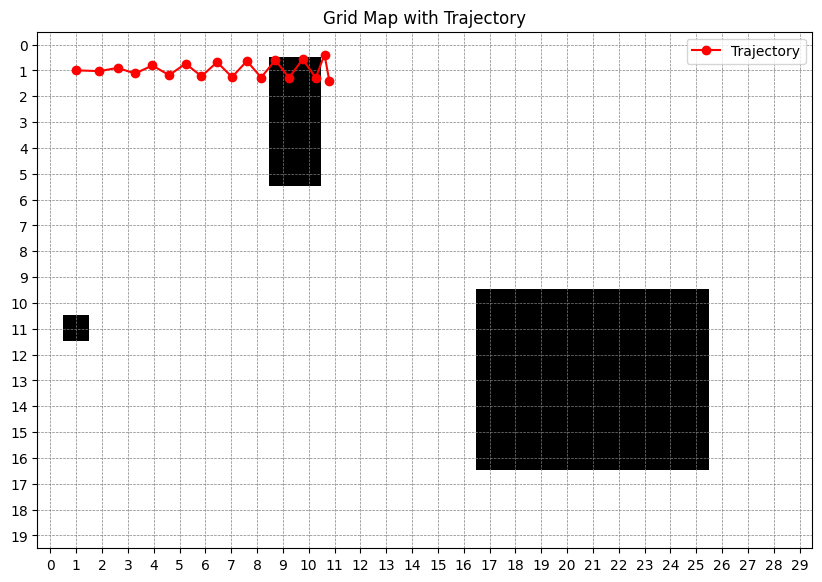

Position:  [10.837318127780836, 0.3394967015067092]
position 0:  10.837318127780836
position 1:  0.3394967015067092
Angle:  4.718013162879864
Kalman update:  (108.24649573715638, 5.399194721729123, 1.6218861091170562)
Kalman position used:  [108.24649573715638, 5.399194721729123]
objective:  [60, 60]  position:  [108.24649573715638, 5.399194721729123, 108.24649573715638, 5.399194721729123, 108.24649573715638, 5.399194721729123, 108.24649573715638, 5.399194721729123, 108.24649573715638, 5.399194721729123, 108.24649573715638, 5.399194721729123, 108.24649573715638, 5.399194721729123, 108.24649573715638, 5.399194721729123, 108.24649573715638, 5.399194721729123, 108.24649573715638, 5.399194721729123]
x_diff:  -48.24649573715638  y_diff:  54.600805278270876  distance:  72.86269476179906
my angle:  1.6218861091170562
waypoint angle:  2.294489004381533
diff angle:  0.6726028952644767
angleDistance:  0.6726028952644767
Speed:  6.0 0.3699315923954622
Kalman prediction:  (108.24649573715638, 5.39

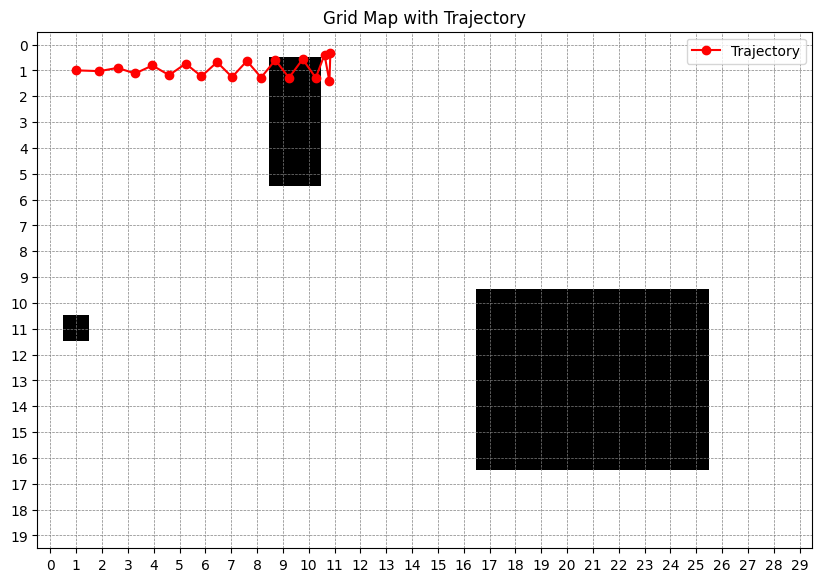

KeyboardInterrupt: 

In [6]:
x_trajectory = []
y_trajectory = []
kalman_positions = []

dt = 0.15

iter = 1

goal = False

map = matrix

# initial position and angle
position = [1, 1]
angle = 0
angle = (2 * math.pi - angle) % (2 * math.pi)

while not goal:
    print("Position: ", position)
    print("position 0: ", position[0])
    print("position 1: ", position[1])
    print("Angle: ", angle)

    if (iter == 1):
        print("First iteration")

        thymio.set_pose(position, angle)

        print("Computing path")
        print("Map shape: ", map.shape)
        path = globalPlanning.dijkstra(map, position, (19, 28))
        thymio.set_path(path)
        plotter.set_map(map, position, (19, 28))
        plotter.plot_path(thymio.get_path_cells())
        filter.initialize_position(thymio.get_position()[0], thymio.get_position()[1], angle)
        filter.set_lastKalman_time()

    # check if camera is obstructed
    if position is not None:
        thymio.update_pose(position, angle)
        x_trajectory.append(float(position[0]))
        y_trajectory.append(float(position[1]))
        # camera measuerement that will then be used for the Kalman filter
        measurement = np.array([thymio.get_position()[0], thymio.get_position()[1], (2*math.pi - angle) % (2*math.pi)])
        filter.kalman_update(measurement)
        print("Kalman update: ", filter.get_state())
    
    # get the state from the Kalman filter
    # the result will depend on the mode of the filter
    x, y, angle = filter.get_state()
    kalman_position = [x, y]
    kalman_positions.append(position)
    print("Kalman position used: ", kalman_position)

    # check if the robot is detecting an obstacle
    # tmclient function to get the proximity sensors
    prox = [0, 0, 0, 0, 0]
    if (localPlanning.is_local_planning(prox)):
        # move with local planning until the robot is not back on the path
        wl, wr = localPlanning.local_planning(prox)
        v, w = thymio.inverseDifferentialDrive(wl, wr)
    else:
        # move with global planning
        v, w, wl, wr, goal = thymio.move(kalman_position, angle)

    print("Speed: ", thymio.convert_speed_cells(v), w)

    # update the Kalman filter
    filter.kalman_prediction(wl, wr)
    print("Kalman prediction: ", filter.get_state())

    # tmdclient function to move the motors
    wl = int(wl)
    wr = int(wr)

    print("Kalman pos 0: ", kalman_position[0])
    print("Kalman pos 1: ", kalman_position[1])
    print("v, w ", v, w)
    print("angle: ", angle)
    print("New angle: ", (angle + w*dt) % (2 * math.pi))

    if abs(w) < 1e-6:
        # treat as a straight line
        position[0] = kalman_position[0] + v * dt * math.cos(angle)
        position[1] = kalman_position[1] + v * dt * math.sin(angle)
    else:
        # use the circular motion equations
        position[0] = kalman_position[0] + (v / w) * (math.sin(angle + w * dt) - math.sin(angle))
        position[1] = kalman_position[1] - (v / w) * (math.cos(angle + w * dt) - math.cos(angle))

    position[0] = thymio.mm_to_cells(position[0])
    position[1] = thymio.mm_to_cells(position[1])

    angle = (angle + w*dt) % (2 * math.pi)
    
    print("Trajectory: ", x_trajectory, y_trajectory)
    plotter.plot_trajectory(x_trajectory, y_trajectory)
    
    
    # sleep for a while
    iter += 1
    time.sleep(dt+1)